W is  [0, 0.08509786201481694, 0.18906650370862016, 0.39607911435242005, 0.5152193499056369, 0.4101748734475131]
Derivative    [-0.43963098 -0.39913824  0.56110531  1.12886893 -0.66355777]
trials 5000


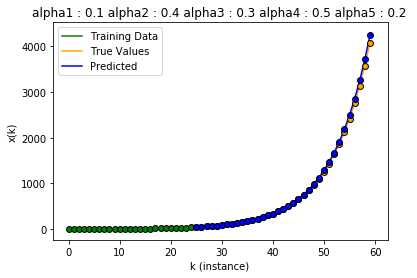

W is  [0, 0.6686354949004903, 0.5403466038026643]
Derivative    [ 0.88607872 -1.01296926]
trials 5000
W [0, 0.6686354949004903, 0.5403466038026643]
Error :  43.088886557919714 d :  2
W is  [0, 0.46114393742288545, 0.34941503376470956, 0.4943160590830164]
Derivative    [ 1.00895947 -1.00574385 -0.16975429]
trials 5000
W [0, 0.46114393742288545, 0.34941503376470956, 0.4943160590830164]
Error :  34.09058416557497 d :  3
W is  [0, 0.2691539966848182, 0.2807077246478578, 0.4065847032202124, 0.47505087859574396]
Derivative    [ 0.48099853 -0.44138072 -0.01835436 -0.12044124]
trials 5000
W [0, 0.2691539966848182, 0.2807077246478578, 0.4065847032202124, 0.47505087859574396]
Error :  26.64660582045536 d :  4
W is  [0, 0.08509786201481694, 0.18906650370862016, 0.39607911435242005, 0.5152193499056369, 0.4101748734475131]
Derivative    [-0.43963098 -0.39913824  0.56110531  1.12886893 -0.66355777]
trials 5000
W [0, 0.08509786201481694, 0.18906650370862016, 0.39607911435242005, 0.5152193499056369, 0

W is  [0, -0.3507084795163354, -0.11394764029512121, 0.04257321366672015, 0.27270497252463555, 0.3445385713886101, -0.07904859543107223, 0.3181096528822749, 0.4195192096295314, 0.3940071072502427, 0.36522443803960813, 0.5022235354571967, 0.6247033026887406, 0.3123536605435361, 0.21886552225308709, 0.516285439015271, 0.4872159211493702, 0.6449107992075712]
Derivative    [ 0.37361664  2.6954059   2.78057502  3.57580232  2.566832   -5.05065888
 -0.40339723 -0.38343375 -1.41376436 -2.0805918  -1.52918094 -0.84687932
 -5.28729952 -6.52822548 -2.97833028 -4.78360854 -2.55392809]
trials 5000
W [0, -0.3507084795163354, -0.11394764029512121, 0.04257321366672015, 0.27270497252463555, 0.3445385713886101, -0.07904859543107223, 0.3181096528822749, 0.4195192096295314, 0.3940071072502427, 0.36522443803960813, 0.5022235354571967, 0.6247033026887406, 0.3123536605435361, 0.21886552225308709, 0.516285439015271, 0.4872159211493702, 0.6449107992075712]
Error :  16.421127291238832 d :  17
W is  [0, -0.45158

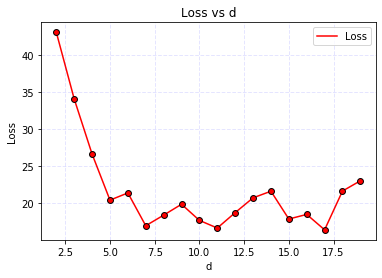

In [2]:
# equation
# xn = alpha1 xn-1 + alpha2 xn-2 + alpha3 xn-3 + alpha4 xn-4  + alpha5 xn-5 + N(0,sigma^2)

from numpy import linalg as LA
import matplotlib.pyplot as plt
import numpy as np


def computeErrorForaSample(w, k, y, d=5):
    error = 0
    for i in range(1, d+1):
        error += w[i]*y[k-i]
    error = y[k]-error
    return error


def computeDerivativeComponent(w, y, d=5):
    derivative = 0
    for i in range(d, len(y)):
        ytemp = []
        for k in range(1, d+1):
            ytemp.append(y[i-k])
        ytemp = np.array(ytemp)
        derivative += computeErrorForaSample(w, i, y,d) * ytemp
    return derivative


def SLP(y, d=5, maxtrials=5000, learning_Rate=0.00001):
    w = [0]
    for i in range(1,d+1):
        w.append(1)
    trials = 0
    derivative = computeDerivativeComponent(w, y,d)
    # while((trials < maxtrials)):
    while((abs(derivative[0]) > 0.01) and trials < maxtrials):
        w[1:] = w[1:] + learning_Rate * derivative
        trials += 1
        derivative = computeDerivativeComponent(w, y,d)
    print('W is ', w)
    print('Derivative   ', derivative)
    print('trials', trials)
    return w


def generateData(samplepoints, alphas, startdata, d=5, mu=0, sigma=1):
    # datapoints = startdata.copy()
    datapoints = []
    for item in startdata:
        datapoints.append(item)
    randomnoise = np.random.normal(mu, sigma, samplepoints)
    for i in range(len(datapoints), samplepoints):
        nextdatapoint = randomnoise[i]
        for j in range(1, d+1):
            nextdatapoint += alphas[j]*datapoints[i-j]
        datapoints.append(nextdatapoint)
    return datapoints[d:]


alphas = np.array([0, 0.1, 0.4, 0.3, 0.5, 0.2])
samplepoints = 25
d = 5
data = [1, 2, 3, 4, 5]
y = generateData(samplepoints, alphas, data)
data = np.append(data, y)
prediectedw = SLP(data)

moresamplepoints = 40
truedata = generateData(moresamplepoints, alphas, data[len(data)-d:len(data)])

predictedY = generateData(moresamplepoints, prediectedw,
                          data[len(data)-d:len(data)])
startPredicted = len(data)
endPredicted = startPredicted + len(predictedY)
plt.scatter(range(len(data)), data, c="green",
            edgecolor='black', linewidth='1', s=35, zorder=2)
plt.plot(range(len(data)), data, zorder=1, c="green", label='Training Data')
plt.scatter(range(startPredicted, endPredicted), truedata,
            c="orange", edgecolor='black', linewidth='1', s=35, zorder=2)
plt.plot(range(startPredicted, endPredicted), truedata,
         zorder=1, c="orange", label='True Values')
plt.scatter(range(startPredicted, endPredicted), predictedY,
            c="blue", edgecolor='black', linewidth='1', s=35, zorder=2)
plt.plot(range(startPredicted, endPredicted), predictedY,
         zorder=1, c="blue", label='Predicted')
plt.title("alpha1 : {} alpha2 : {} alpha3 : {} alpha4 : {} alpha5 : {} ".format(
    alphas[1], alphas[2], alphas[3], alphas[4], alphas[5]))
plt.xlabel('k (instance) ')
plt.ylabel('x(k)')
plt.legend()
plt.show()


def findLossVaryingD(y, drange=range(5, 6)):
    errorlist = []
    for d in drange:
        predictedw = SLP(y,d)
        error = 0
        for k in range(d, len(y)):
            currentsampleerror = computeErrorForaSample(predictedw, k, y, d)
            error += currentsampleerror**2
        print('W', predictedw)
        print('Error : ', error, 'd : ', d)
        errorlist.append(error)
    return errorlist


drange = range(2,20)
errorList = findLossVaryingD(data,drange)
plt.scatter(drange, errorList, c="red",
            edgecolor='black', linewidth='1', s=35, zorder=2)
plt.plot(drange, errorList, zorder=1, c="red", label='Loss')
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.1)
plt.xlabel('d')
plt.ylabel('Loss')
plt.title('Loss vs d')
plt.legend()
plt.show()